<a href="https://colab.research.google.com/github/ibonetc/Finance_ML/blob/main/ML_Finance_Example_Regression_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de uso de pycaret

Vamos a usar la base de datos de UCI llamada Boston. Los datos de viviendas de Boston se recopilaron en 1978 y cada una de las 506 entradas representa datos agregados sobre 14 características de viviendas de varios suburbios de Boston, Massachusetts.

CRIM - tasa de criminalidad per cápita por ciudad

ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

INDUS - proporción de acres comerciales no minoristas por ciudad.

CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)

NOX - concentración de óxidos nítricos (partes por 10 millones)

RM - número promedio de cuartos por vivienda

EDAD - proporción de unidades ocupadas por propietarios construidas antes de 1940

DIS: distancias ponderadas a cinco centros de empleo de Boston

RAD - índice de accesibilidad a las carreteras radiales

IMPUESTOS: tasa de impuestos sobre la propiedad de valor total por cada $10,000

PTRATIO - ratio alumno-profesor por localidad

B - 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

LSTAT - % estado más bajo de la población

MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares



In [ ]:
!pip install pycaret

In [ ]:
!pip install explainerdashboard
!pip install autoviz

In [ ]:
!pip install markupsafe==2.0.1
import jinja2

In [2]:
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab>

In [3]:
from pycaret.datasets import get_data
dataset = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## División de los datos en entrenamiento, prueba y validación
Escogeremos un 5% de los datos para validación, del resto un 75% para entrenamiento (con validación cruzada) y un 15% para prueba

In [4]:
data = dataset.sample(frac=0.95, random_state=7) # dejando un 5% para validación
validation_data = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
validation_data.reset_index(inplace=True, drop=True)

In [5]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
1,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5
2,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
3,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
4,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
477,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
478,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1
479,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4


In [6]:
validation_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5
1,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
2,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
3,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
4,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,396.90,13.09,17.4
5,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
6,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
7,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8
8,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,29.4
9,0.06047,0.0,2.46,0,0.488,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6


In [7]:
dataset.shape

(506, 14)

In [8]:
data.shape

(481, 14)

In [9]:
validation_data.shape

(25, 14)

In [10]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Configuración del entorno de Pycaret

La función setup() inicializa el entorno de pycaret y crea el pipeline de transformación para preparar los datos para el modelado. Esta función debe ser llamada antes de ejecutar cualquier otra función. 

Tiene dos parámetros obligatorios:

* data: donde deben pasarse los datos
* target: el nombre de la columna objetivo.

Además tiene otras como:

* train_size: para dar el tamaño del conjunto de entrenamiento, que por defecto es 70% (0.7)
* la validación k-fold, por defecto está en k=10
* session_id: es la semilla aletoria para la división de los datos.

In [11]:
s = setup(data = data, target = 'medv', session_id=7,train_size=0.75)

,Description,Value
0,session_id,7
1,Target,medv
2,Original Data,"(481, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(360, 21)"


## Comparar los modelos

La función *compare_model()* permite hacer una validación cruzada de 10 fold por defecto.

In [12]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2468,9.6645,3.0427,0.8744,0.1409,0.1144,0.097
et,Extra Trees Regressor,2.1662,10.3818,3.1550,0.8687,0.1347,0.1063,0.450
rf,Random Forest Regressor,2.3542,11.8456,3.3675,0.8449,0.1492,0.1188,0.528
lightgbm,Light Gradient Boosting Machine,2.3222,12.8874,3.4809,0.8299,0.1573,0.1181,0.106
ada,AdaBoost Regressor,2.7029,13.7607,3.6354,0.8211,0.1699,0.1442,0.099
dt,Decision Tree Regressor,3.2925,21.2859,4.5450,0.7287,0.2101,0.1679,0.018
lr,Linear Regression,3.2957,22.4706,4.6919,0.7197,0.2336,0.1649,0.420
ridge,Ridge Regression,3.2687,22.5493,4.6970,0.7192,0.2315,0.1644,0.013
br,Bayesian Ridge,3.2616,22.7608,4.7185,0.7171,0.2295,0.1644,0.015
lasso,Lasso Regression,3.6320,26.9899,5.1663,0.6650,0.2342,0.1751,0.015


## Crear un modelo

La función *create_model()* entrena y evalúa un modelo, utilizando validación cruzada, esto se puede establecer en el parámetro fold.

In [16]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8000,18.1230,4.2571,0.7170,0.1662,0.1303
1,1.8415,4.9551,2.2260,0.9244,0.0980,0.0835
2,2.2625,7.4857,2.7360,0.9298,0.1178,0.0991
3,2.3628,10.3204,3.2125,0.8686,0.1583,0.1236
4,2.5985,12.1612,3.4873,0.8004,0.1813,0.1497
5,2.5518,10.7190,3.2740,0.8577,0.1923,0.1688
6,1.9623,9.0349,3.0058,0.9142,0.1216,0.0946
7,2.0290,7.4633,2.7319,0.8921,0.1257,0.0955
8,2.4621,12.5875,3.5479,0.8866,0.1454,0.1164


In [17]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [20]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0529,23.2162,4.8183,0.6374,0.1763,0.1386
1,1.9169,6.2593,2.5019,0.9045,0.1139,0.0903
2,2.2215,8.5143,2.9179,0.9201,0.1164,0.0965
3,2.1014,9.1835,3.0304,0.8831,0.1385,0.1051
4,2.5649,13.4685,3.6699,0.7789,0.1785,0.1406
5,2.4608,10.2524,3.2019,0.8639,0.1859,0.1591
6,2.0080,9.1385,3.0230,0.9132,0.1229,0.0996
7,2.0680,8.7013,2.9498,0.8742,0.1310,0.0990
8,2.7229,13.9403,3.7337,0.8744,0.1733,0.1369


In [21]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls',
                          max_depth=10, max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=180,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


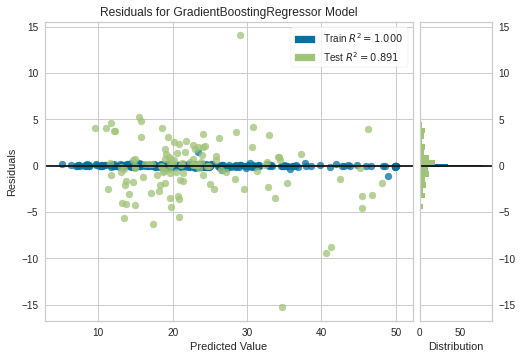

In [22]:
plot_model(tuned_gbr, plot = 'residuals')

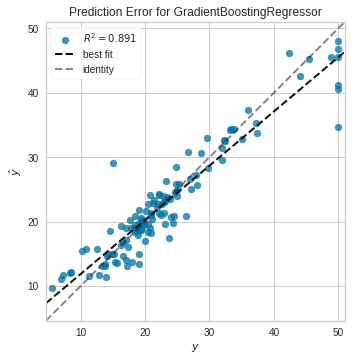

In [23]:
plot_model(tuned_gbr, plot = 'error')

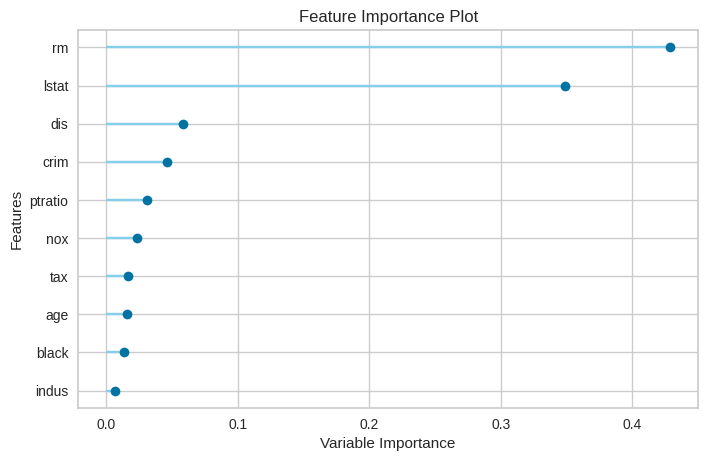

In [24]:
plot_model(tuned_gbr, plot='feature')

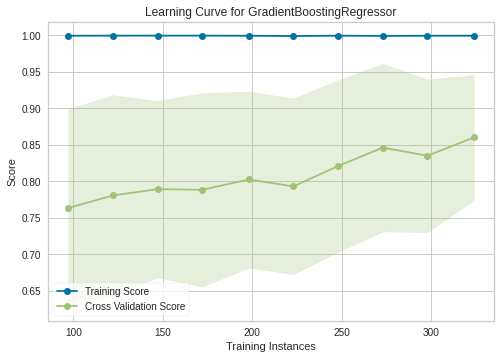

In [25]:
plot_model(tuned_gbr, plot = 'learning')

## Predecir con el modelo

In [26]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.1566,10.4369,3.2306,0.8906,0.1523,0.1128


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,9.924850,0.0,18.10,0.740,6.251,96.599998,2.1980,666.0,20.200001,388.519989,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.600000,15.725186
1,25.046101,0.0,18.10,0.693,5.987,100.000000,1.5888,666.0,20.200001,396.899994,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.600000,9.622137
2,0.054970,0.0,5.19,0.515,5.985,45.400002,4.8122,224.0,20.200001,396.899994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.000000,19.710291
3,1.273460,0.0,19.58,0.605,6.250,92.599998,1.7984,403.0,14.700000,338.920013,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.000000,26.543497
4,4.422280,0.0,18.10,0.584,6.003,94.500000,2.5403,666.0,20.200001,331.290009,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.100000,13.398342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,9.724180,0.0,18.10,0.740,6.406,97.199997,2.0651,666.0,20.200001,385.959991,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.100000,14.092443
117,0.021770,82.5,2.03,0.415,7.610,15.700000,6.2700,348.0,14.700000,395.380005,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.299999,46.198120
118,0.289550,0.0,10.59,0.489,5.412,9.800000,3.5875,277.0,18.600000,348.929993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.700001,17.393307
119,0.088730,21.0,5.64,0.439,5.963,45.700001,6.8147,243.0,16.799999,395.559998,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.700001,19.986001


## Entrenar el modelo con todos los datos

In [28]:
final_gbr = finalize_model(tuned_gbr);

## Probar el modelo con los datos de validación

In [29]:
validation_predictions = predict_model(final_gbr, data=validation_data)
validation_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.9918,6.5736,2.5639,0.8478,0.13,0.1066


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5,13.875690
1,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9,15.484704
2,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,24.351060
3,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0,20.636201
4,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,396.90,13.09,17.4,19.136199


## Guardar el modelo

In [30]:
save_model(final_gbr,'boston_14Mayo2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='medv',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=10, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                         

## Cargando el modelo

Se debe poner sin la extención .pkl

In [31]:
saved_final_model=load_model('boston_14Mayo2022')

Transformation Pipeline and Model Successfully Loaded


In [32]:
new_prediction = predict_model(saved_final_model, data=validation_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.9918,6.5736,2.5639,0.8478,0.13,0.1066


In [33]:
new_prediction.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5,13.875690
1,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9,15.484704
2,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,24.351060
3,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0,20.636201
4,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,396.90,13.09,17.4,19.136199


Vea que los resultados son los mismo, lo que verifica que el modelo se guardó correctamente

In [35]:
from pycaret.utils import check_metric
check_metric(new_prediction['medv'], new_prediction['Label'], metric = 'MSE')

6.5736